In [185]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

import matplotlib.pyplot as plt

import seaborn as sns 

In [154]:
house_frame = pd.read_csv('house.csv', sep=',')
frame= pd.DataFrame(house_frame.id.str.split(',').tolist())
house_frame = house_frame.assign(id=frame[0])
house_frame = house_frame.assign(date=frame[1])
house_frame = house_frame.assign(price=frame[2])
house_frame = house_frame.assign(bedrooms=frame[3])
house_frame = house_frame.assign(bathrooms=frame[4])
house_frame = house_frame.assign(sqft_living=frame[5])
house_frame = house_frame.assign(sqft_lot=frame[6])
house_frame = house_frame.assign(floors=frame[7])
house_frame = house_frame.assign(waterfront=frame[8])
house_frame = house_frame.assign(view=frame[9])
house_frame = house_frame.assign(condition=frame[10])
house_frame = house_frame.assign(grade=frame[11])
house_frame = house_frame.assign(sqft_above=frame[12])
house_frame = house_frame.assign(sqft_basement=frame[13])
house_frame = house_frame.assign(yr_built=frame[14])
house_frame = house_frame.assign(yr_renovated=frame[15])
house_frame = house_frame.assign(zipcode=frame[16])
house_frame = house_frame.assign(lat=frame[17])
house_frame = house_frame.assign(long=frame[18])
house_frame = house_frame.assign(sqft_living15=frame[19])
house_frame = house_frame.assign(sqft_lot15=frame[20])


In [155]:

del house_frame['date']
del house_frame['zipcode']
house_frame.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1,1180,5650,"""1""",0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,"""2""",0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639
2,5631500400,180000,2,1,770,10000,"""1""",0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3,1960,5000,"""1""",0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2,1680,8080,"""1""",0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [156]:

plo = pd.DataFrame(house_frame.floors.str.split('').tolist())
house_frame = house_frame.assign(floors=plo[2])


In [157]:

house_frame = house_frame.apply(pd.to_numeric, errors='ignore')

house_frame.dropna(axis=1, how='all', thresh=0)
house_frame.isnull().sum()
house_frame.info()                  
house_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  int64  
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


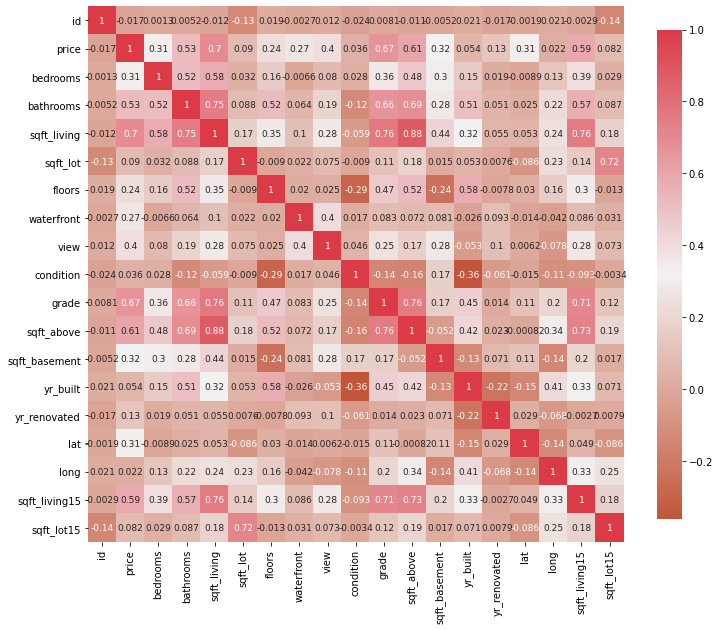

In [158]:


def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        ) 
    
plot_correlation_map(house_frame)    

 2 : selection de caracterisque
 
According to the correlation between the variables and the target "price",
the variables' sqft_living ',' sqft_above ',' grade 'show positive correlations above the average 
hence these variables (' sqft_living ',' sqft_above ',' grade ') will predict the "price" exit more accurately


In [202]:


house_frame1 = house_frame[['price','sqft_living', 'sqft_above', 'grade']]
house_frame1.head()


,price,sqft_living,sqft_above,grade
0,221900.0,1180,1180,7
1,538000.0,2570,2170,7
2,180000.0,770,770,6
3,604000.0,1960,1050,7
4,510000.0,1680,1680,8


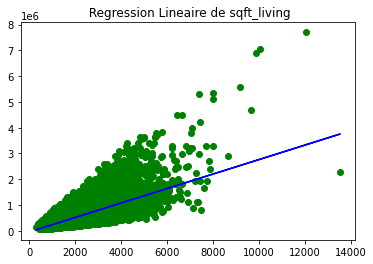

MSE 61808548706.77469
R squared 0.48026967857504865


0.4928532179037931

In [190]:

# 3 : DIVISION DE DONNEES

#  sqft_living

X=house_frame1['sqft_living'].values[:,np.newaxis]
Y=house_frame1['price'].values
 
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20, random_state=0)
# 4 : REGRESSION LINEAIRE1
model=LinearRegression() 
model.fit(X,Y)
predicted=model.predict(X_test)

#  5: GRAPHE DE LA REGRESSION LINEAIRE : sqft_living
plt.scatter(X,Y,color="green")
plt.title(" Regression Lineaire de sqft_living")
plt.plot(X,model.predict(X),color="b")
plt.show()

# performance

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))
model.score(X, Y)


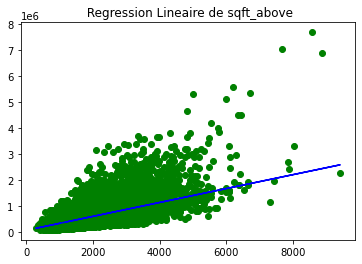

MSE 76731026437.6757
R squared 0.3547908522668719


0.3667117528382793

In [195]:
# sqft_above
X=house_frame1['sqft_above'].values[:,np.newaxis]
Y=house_frame1['price'].values
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20, random_state=0)

# REGRESSION LINEAIRE4
model=LinearRegression() 
model.fit(X,Y)
predicted=model.predict(X_test)

# GRAPHE DE LA REGRESSION LINEAIRE : sqft_above
plt.scatter(X,Y,color="green")
plt.title(" Regression Lineaire de sqft_above")
plt.plot(X,model.predict(X),color="b")
plt.show()

# performance

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))
model.score(X, Y)

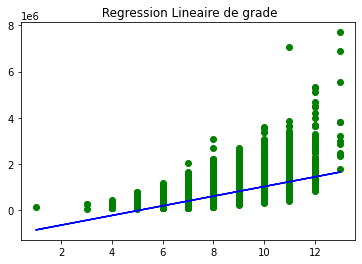

MSE 62555189867.30136
R squared 0.47399138765140025


0.44546848610928724

In [198]:
#  grade
X=house_frame1['grade'].values[:,np.newaxis]
Y=house_frame1['price'].values
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20, random_state=0)
# REGRESSION LINEAIRE 5
model=LinearRegression() 
model.fit(X,Y)
predicted=model.predict(X_test)
# GRAPHE DE LA REGRESSION LINEAIRE : grade
plt.scatter(X,Y,color="green")
plt.title(" Regression Lineaire de grade")
plt.plot(X,model.predict(X),color="b")
plt.show()
# performance
print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))
model.score(X, Y)

In [182]:
#  6 : REGRESSION multi-LINEAIRE


X=house_frame1[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade','view']]
Y=house_frame1['price']
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20, random_state=0)

model=LinearRegression() 
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
# performance

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

model.score(X, Y)

MSE 50717942313.28252
R squared 0.5735274001409252


0.5758159551863862

 LA REGRESSION lineaire et multilineaire: comparaison

Multilinear regression gives a better prediction of an output on a set of several variables 
while linear regression gives us the prediction on a given variable.

In [205]:
#  7 :  REGRESSION polynomiale

X=house_frame1[['sqft_living', 'sqft_above', 'grade']]
Y=house_frame1['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

X_train_fit = poly.fit_transform(X_train) 
lg.fit(X_train_fit, Y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(Y_test, predicted))
print("R squared: ", metrics.r2_score(Y_test,predicted))


MSE:  50788901720.83792
R squared:  0.5960078004858047


 LA REGRESSION polynomiale, lineaire et multilineaire: comparaison
 
Polynomial regression gives a better prediction with more precision
than multi_linear regression and linear regression.
